In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split, KFold

In [3]:
df = pd.read_csv("../data/ArchiveII.csv")
df_ = df.query("len <= 128")
df_

,id,sequence,structure,base_pairs,len
0,5s_Acholeplasma-laidlawii-1,UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACA...,((((((((......((((((((....((((((.............)...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",112
1,5s_Acidovorax-temperans-1,UGCCUGAUGACCAUAGCAAGUUGGUACCACUCCUUCCCAUCCCGAA...,.(((((((((.....((((((((.....((((((...............,"[[2, 115], [3, 114], [4, 113], [5, 112], [6, 1...",115
3,tRNA_tdbR00000055-Schizosaccharomyces_pombe-48...,UCCGUUGUGGUCCAACGGCUAGGAUUCGUCGCUUUCACCGACGGGA...,(((((((..((((........))))((((((.......)))))).....,"[[1, 71], [2, 70], [3, 69], [4, 68], [5, 67], ...",75
5,5s_Methanothermobacter-thermautotrophicus-6,GGGGCAUGGCGGUCAUGGCGCAGGGGUUAUACCUGAUCUCGUUUCG...,.((((.(((((((....(((((((......((((((.............,"[[2, 127], [3, 125], [4, 124], [5, 123], [7, 1...",128
6,srp_Vibr.fisc._CP000020,UGGGGCUCUGGUCCUCUCGCAACAAUAGUUCGUGAACUCGGUCAGG...,(((((((((((((.((((((.((((..((((((.....((((.......,"[[1, 104], [2, 103], [3, 102], [4, 101], [5, 1...",111
...,...,...,...,...,...
3857,5s_Pseudomonas-stutzeri-2,GCUUGACGACCAUAGAGCGUUGGAACCACCUGAUCCCAUCCCGAAC...,(((((((((.....((((((((.....((((((................,"[[1, 119], [2, 117], [3, 116], [4, 115], [5, 1...",120
3859,5s_Bacillus-cereus-6,UGGUAAUGAUGGCAGAGAGGUCACACCCGUUCCCAUACCGAACACG...,((((((.....((((((((.....((((((.............)))...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",114
3860,srp_Myco.aviu._AE016958,GGGGACCCCGCGCACCCGACAGAGCCCGUUGACCCUUGCUGCCUUC...,((((.....(.(...(.(.....(.(....).).....).).).)....,"[[1, 53], [2, 52], [3, 51], [4, 50], [10, 45],...",88
3862,5s_Triticum-aestivum-1,GGAUGCGAUCAUACCAGCACUAAAGCACCGGAUCCCAUCAGAACUC...,(((((((((....(((((((......((((((............))...,"[[1, 118], [2, 117], [3, 116], [4, 115], [5, 1...",120


In [4]:
print("No max len")
print(df["id"].str.split("_").str[0].value_counts())
print("Max len = 128")
print(df_["id"].str.split("_").str[0].value_counts())

No max len
id
5s            1283
srp            918
tRNA           557
tmRNA          462
RNaseP         454
grp1            74
16s             66
telomerase      35
23s             15
Name: count, dtype: int64
Max len = 128
id
5s        1269
tRNA       557
srp        494
16s          4
tmRNA        1
RNaseP       1
Name: count, dtype: int64


In [5]:
df_["fam"] = df_["id"].str.split("_").str[0]
df_ = df_.query('fam not in ["16s", "tmRNA", "RNaseP"]')
# df_.to_csv('data/ArchiveII_max_length_128.csv', index=False)

/tmp/ipykernel_67837/4223402520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_["fam"] = df_["id"].str.split("_").str[0]


In [29]:
count = df_.groupby("fam")["id"].agg("count").reset_index()
count.sort_values("fam", ascending=False)

,fam,id
2,tRNA,557
1,srp,494
0,5s,1269


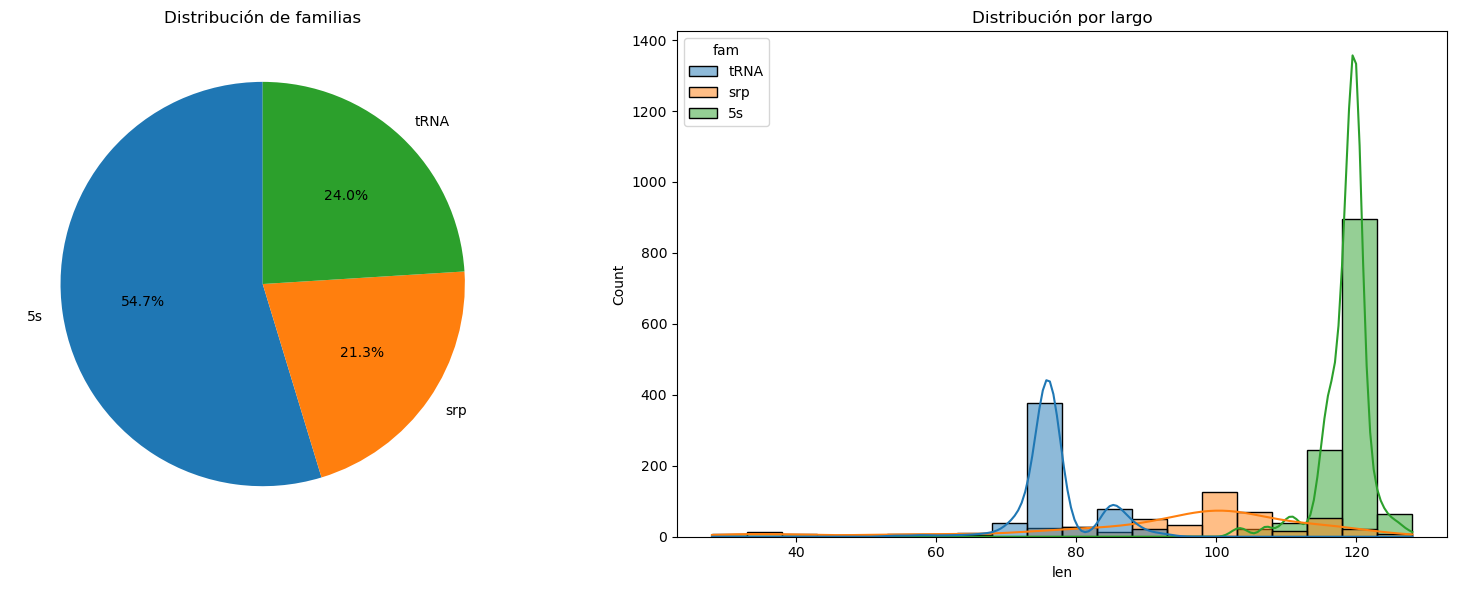

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar la figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de torta
axes[0].pie(count["id"], labels=count["fam"], autopct="%1.1f%%", startangle=90)
axes[0].set_title("Distribución de familias")

# Histograma con Seaborn
sns.histplot(
    data=df_.sort_values("fam", ascending=False),
    x="len",
    hue="fam",
    bins=20,
    kde=True,
    ax=axes[1],
)
axes[1].set_title("Distribución por largo")

plt.tight_layout()
plt.show()

In [45]:
df2 = {}
df2["test_srp"] = df_.query("fam == 'srp'")
df2["no_srp"] = df_.query("fam != 'srp'")
df2["train_srp"], df2["valid_srp"] = train_test_split(df2["no_srp"], test_size=0.2)

In [46]:
df2["test_tRNA"] = df_.query("fam == 'tRNA'")
df2["no_tRNA"] = df_.query("fam != 'tRNA'")
df2["train_tRNA"], df2["valid_tRNA"] = train_test_split(df2["no_tRNA"], test_size=0.2)

In [55]:
for kind in ["srp", "tRNA"]:
    df2["train_" + kind].to_csv(
        f"../data/ArchiveII-KFold/fam-split/train_{kind}.csv", index=False
    )
    df2["valid_" + kind].to_csv(
        f"../data/ArchiveII-KFold/fam-split/valid_{kind}.csv", index=False
    )
    df2["test_" + kind].to_csv(
        f"../data/ArchiveII-KFold/fam-split/test_{kind}.csv", index=False
    )